# [Игнац Филипп Земмельвейс (1818-1865)](https://ru.wikipedia.org/wiki/%D0%97%D0%B5%D0%BC%D0%BC%D0%B5%D0%BB%D1%8C%D0%B2%D0%B5%D0%B9%D1%81,_%D0%98%D0%B3%D0%BD%D0%B0%D1%86_%D0%A4%D0%B8%D0%BB%D0%B8%D0%BF%D0%BF)
Венгерский врач-акушер, профессор, получивший прозвище «спаситель матерей» за обнаружение причин родильной горячки.
![title](https://www.krugosvet.ru/sites/krugosvet.ru/files/img03/1003658_7373_001.jpg)

В больнице, в которой работал наш герой, из-за большой загрузки решено было разделить акушерское отделение на две клиники.

Земмельвейс составил таблицу, в которую вносил все данные о поступивших в 1-ю и 2-ю клинику пациентках. Вот эти данные:

In [1]:
import pandas as pd
import seaborn as sns
death_rates = pd.read_csv('death_rates_before.csv')
death_rates

,year,births,deaths,clinic
0,1841,3036,237,clinic 1
1,1842,3287,518,clinic 1
2,1843,3060,274,clinic 1
3,1844,3157,260,clinic 1
4,1845,3492,241,clinic 1
5,1846,4010,459,clinic 1
6,1841,2442,86,clinic 2
7,1842,2659,202,clinic 2
8,1843,2739,164,clinic 2
9,1844,2956,68,clinic 2


Он выяснил, что за последние шесть лет в первом отделении умерло почти 2000 женщин, а во втором — 700. 

In [2]:
death_rates.groupby('clinic').sum()

,year,births,deaths
clinic,,,
clinic 1,11061,20042,1989
clinic 2,11061,17791,691


In [3]:
# посчитаем смертность для каждой больницы
death_rates['death_rate'] = death_rates.deaths / death_rates.births
death_rates

,year,births,deaths,clinic,death_rate
0,1841,3036,237,clinic 1,0.078063
1,1842,3287,518,clinic 1,0.157591
2,1843,3060,274,clinic 1,0.089542
3,1844,3157,260,clinic 1,0.082357
4,1845,3492,241,clinic 1,0.069015
5,1846,4010,459,clinic 1,0.114464
6,1841,2442,86,clinic 2,0.035217
7,1842,2659,202,clinic 2,0.075968
8,1843,2739,164,clinic 2,0.059876
9,1844,2956,68,clinic 2,0.023004


In [4]:
death_rates.groupby('clinic').mean()

,year,births,deaths,death_rate
clinic,,,,
clinic 1,1843.5,3340.333333,331.500000,0.098505
clinic 2,1843.5,2965.166667,115.166667,0.040400


<AxesSubplot:xlabel='year', ylabel='death_rate'>

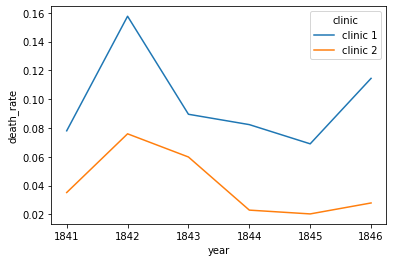

In [5]:
# визуализируем смертность
sns.lineplot(x='year', y='death_rate', hue='clinic', data=death_rates)

В попытках приблизить условия в 1-м отделении ко 2-му, он начал копировать в мельчайших нюансах применяемую там технику: давать женщинам рожать в позе лёжа на боку, а не на спине, переносить их в палаты после родов, а не заставлять идти самостоятельно; Земмельвейс также увеличил контроль за вентиляцией палат и изменил подход к распределению лекарств. Все эти усилия оказались тщетными.

In [6]:
# помесячные данные о смертности в проблемной больнице (уже до 49 года)
death_rates_after = pd.read_csv('death_rates_after.csv', parse_dates=['date'])
death_rates_after

,date,births,deaths
0,1841-01-01,254,37
1,1841-02-01,239,18
2,1841-03-01,277,12
3,1841-04-01,255,4
4,1841-05-01,255,2
...,...,...,...
93,1848-11-01,310,9
94,1848-12-01,373,5
95,1849-01-01,403,9
96,1849-02-01,389,12


In [7]:
# посчитаем смертность
death_rates_after['death_rate'] = death_rates_after.deaths / death_rates_after.births
death_rates_after

,date,births,deaths,death_rate
0,1841-01-01,254,37,0.145669
1,1841-02-01,239,18,0.075314
2,1841-03-01,277,12,0.043321
3,1841-04-01,255,4,0.015686
4,1841-05-01,255,2,0.007843
...,...,...,...,...
93,1848-11-01,310,9,0.029032
94,1848-12-01,373,5,0.013405
95,1849-01-01,403,9,0.022333
96,1849-02-01,389,12,0.030848


Желая проверить распространённую в то время теорию, что родильную горячку вызывает эмоциональное потрясение у роженицы, Земмельвейс решил провести эксперимент — он пригласил священника, который каждый день с колоколом обходил палаты и соборовал умирающих. Лежащие на соседних койках женщины были в ужасе, однако на смертность это никак не повлияло.

К сожалению, числовых данных об этом эксперименте не сохранилось.

Но доктор все же сделал то, что привело к реальному изменению ситуации.

<AxesSubplot:xlabel='date', ylabel='death_rate'>

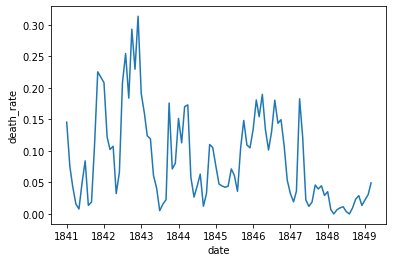

In [8]:
# визуализируем смертность. Когда были введены изменения?
sns.lineplot(x='date', y='death_rate', data=death_rates_after)

Земмельвейс уже давно обращал внимание, что после работы в анатомическом отделении от рук врачей и студентов шёл трупный запах, который оставался даже после мытья с мылом. В клинике Клейна каждую роженицу несколько раз осматривал врач и до 10 студентов, многие из которых могли до того работать в морге. Чтобы подтвердить свою гипотезу, в конце мая 1847 года Земмельвейс обязал персонал больницы перед манипуляциями с беременными и роженицами тщательно мыть руки в растворе хлорной извести, в том числе вычищать щёткой зоны под ногтями. Такой же обработке подвергали все инструменты. Кроме того, над кроватью каждой роженицы вешали табличку с именами врачей и студентов, которые с ней работали — так сразу обнаруживались ответственные за смерть пациентки.

Земмельвейс проверил свою гипотезу, а мы проверим свою: действительно ли введенные им мероприятия статистчиески значимо изменили ситуацию или это случайность?

In [9]:
important_date = pd.to_datetime('1847-06-01')
death_rates_after['important_date'] = death_rates_after.date.map(lambda x: 'before' if x < important_date else 'after')
death_rates_after

,date,births,deaths,death_rate,important_date
0,1841-01-01,254,37,0.145669,before
1,1841-02-01,239,18,0.075314,before
2,1841-03-01,277,12,0.043321,before
3,1841-04-01,255,4,0.015686,before
4,1841-05-01,255,2,0.007843,before
...,...,...,...,...,...
93,1848-11-01,310,9,0.029032,after
94,1848-12-01,373,5,0.013405,after
95,1849-01-01,403,9,0.022333,after
96,1849-02-01,389,12,0.030848,after


<AxesSubplot:xlabel='date', ylabel='death_rate'>

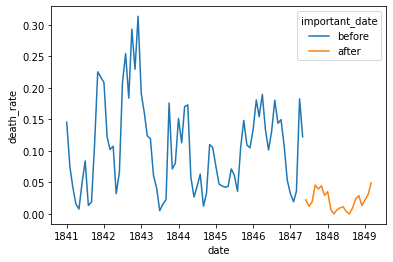

In [10]:
# отделим "до" от "после"
sns.lineplot(x='date', y='death_rate', hue='important_date', data=death_rates_after)

In [11]:
# на какой процент смертность стала в среднем меньше?
by_event = death_rates_after.groupby('important_date').mean().death_rate
difference = by_event.after - by_event.before
difference

# а может это случайность?

-0.0839566075118334

## Доверительные интервалы на основе бутстрэпа

[Бутстрэп](https://en.wikipedia.org/wiki/Bootstrapping_(statistics)) – метод исследования распределения статистик, основанный на многократной генерации выборок на базе имеющейся выборки. Позволяет просто и быстро оценивать самые разные статистики. Бутстрэп используется для тестирования гипотез, построения доверительных интервалов. 

### Бутстрэповский доверительный интервал: алгоритм

Если у нас есть выборка и требуется оценить какой-либо параметр (в нашем случае разницу до-после), но мы не можем провести много экспериментов для повышения точности вывода, то мы можем набрать псевдовыборки из имеющихся данных и условиться, что каждая из них — как бы  результат повторения эксперимента. Размер псевдовыборок равен размеру настоящей выборки, но элементы отбираем случайно и "с возвращением", т.е. какие-то позиции из исходной выборки могут быть отобраны несколько раз, а какие-то могуть не попасть в нее вообще. Это нормально, т.к. псевдовыборок будет очень много.

Для каждой из псевдовыборок вычисляется нужный параметр, с помощью которых и строится доверительный интервал.


![title](https://yashuseth.files.wordpress.com/2017/12/bootstrap.png?w=1174&h=542)

In [14]:
# генерируем как можно больше разниц показателей "до" и "после", случайно их выбирая

d_dif = []
for i in range(7000):
    before = death_rates_after.query('important_date == "before"').sample(frac=1, replace=True).death_rate.mean()
    after = death_rates_after.query('important_date == "after"').sample(frac=1, replace=True).death_rate.mean()
    d_dif.append(after - before)

d_dif

[-0.07973085523570089,
 -0.08652717122040426,
 -0.07683538860852634,
 -0.08717658412456444,
 -0.06076654040236982,
 -0.07361117665612038,
 -0.08971641441000712,
 -0.08806454223183852,
 -0.09303886879475862,
 -0.08779384283715669,
 -0.08258951157693638,
 -0.08329112735660378,
 -0.08257880808437121,
 -0.09042647183449636,
 -0.08586118732541707,
 -0.08674764246732125,
 -0.09307944504984986,
 -0.0712064057292899,
 -0.08072482412400757,
 -0.08873905280582238,
 -0.09327439377808273,
 -0.09466275102733258,
 -0.09253338561785823,
 -0.09646065537595903,
 -0.07225807659213507,
 -0.08858555563644929,
 -0.08963205587189559,
 -0.08034805270087972,
 -0.08797571422258814,
 -0.08446217101903805,
 -0.06552608965905639,
 -0.07991851226598919,
 -0.0888927512380453,
 -0.07723319747484125,
 -0.07656480843005718,
 -0.07821639956256672,
 -0.09214806661930916,
 -0.08344531768098111,
 -0.08613083918970871,
 -0.07784556387834068,
 -0.07720669275912659,
 -0.07188730595376391,
 -0.07867778610764295,
 -0.079117533

In [13]:
# определяем 95% доверительный интервал
confidence_interval = pd.Series(d_dif).quantile([0.025, 0.975])
confidence_interval

0.025   -0.100755
0.975   -0.067184
dtype: float64

Какой должен быть доверительный интервал, чтобы мы сочли случайными изменения после практик, введенных Земмельвейсом?

Что мы, возможно, не учли?

Открытие Земмельвейса опровергало сразу несколько догм, распространённых в медицине того времени, большинство коллег категорически отказывались внедрять его практику, а начальство усматривало в нём только угрозу своему положению.

Из-за сопротивления научного сообщества у Земмельвейса случился нервный срыв и развилась депрессия. В 1865 году сорокасемилетнего Земмельвейса без его согласия, обманом госпитализировали в психиатрическую лечебницу, где через две недели он умер от побоев, нанесённых ему сотрудниками клиники. 